# First Part - Necessary Code

In [1]:
# Import
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import colors as c

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
# Colors
nemo = "#FF4A11"
granite = "#252629"
blue = "#33A5FF"
#green = "#03AC13"

### Plotting Function

In [3]:
def plot_sigmoid(color, figsize=(10, 6)):
    t = np.linspace(-5, 5, 100)
    z = 1/(1 + np.exp(-t))

    plt.figure(figsize=figsize)
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})
    plt.plot(t, z, linewidth=2.5, color=color)
    plt.xlabel("t")
    plt.ylabel(r"$\sigma(t)$")
    plt.yticks([0,0.5,1])
    plt.hlines(y =1, xmin=-5,xmax=5, linestyles="dashed", colors="k")
    plt.hlines(y =0.5, xmin=-5,xmax=5, linestyles="dashed", colors="k")
    plt.hlines(y =0, xmin=-5,xmax=5, linestyles="dashed", colors="k")
    plt.axvline(x=0, color='k')
    sns.despine()
    plt.show()

In [4]:
def plot_logarithm(color, minor_ticks=True, zoom=False, figsize=(10,6), ax=None):
    x = np.linspace(0.0001, 10, 400)
    z = np.log(x)
    minor_ticks_array = np.arange(0,11,1)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})

    ax.plot(x, z, linewidth=2.5, color=color)
    ax.set_xlabel("x")
    ax.set_ylabel(r"$ln(x)$")
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(which= "both", alpha=0.1)
    if zoom:
        ax.set_xlim(0,1.2)
        ax.set_ylim(-3,1)
    else:
        ax.set_ylim(-3,3)
        ax.set_xlim(0,10)
    if minor_ticks:
        ax.set_xticks(minor_ticks_array, )
    sns.despine()

In [5]:
def plot_loss(color, predicted_class, figsize=(10, 6), ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        
    p = np.linspace(0.0001, 0.999, 400)
    
    if predicted_class == 1:
        z = -np.log(p)
        y_label = "$-ln(\hat{p})$"
        legend_label = "loss for class 1"
    elif predicted_class == 0:
        z = -np.log(1-p)
        y_label = "$-ln(1-\hat{p})$"
        legend_label = "loss for class 0"
    
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})

    ax.plot(p, z, linewidth=2.5, color= nemo)
    ax.set_ylabel(f"{y_label}")
    ax.set_xlabel(r"$\hat{p}$")
    ax.set_xlim(0,1)
    ax.set_ylim(-0,4)
    sns.despine()
    ax.grid(alpha=0.1)
    ax.legend([legend_label])

### Intuition LogReg

In [6]:
# Data
data = np.array([1,3,3.5,5,6,8,8.5,10,11,40]).reshape(-1, 1)
label = np.array([0,0,0,0,0,1,1,1,1,1])

In [7]:
def train_model(data, label):
    model = LinearRegression()
    model.fit(data, label)
    y_pred = model.predict(data)
    # return x value for y=0.5
    boundary_x = (0.5 - model.intercept_) / model.coef_[0]
    return model, y_pred, boundary_x


def create_example(data, label, figsize=(10,6), regression=False, add_lines=False, outlier=False, compare=False):
    
    model_wo_outlier, y_pred_wo_outlier, boundary_wo_outlier = train_model(data[:-1], label[:-1])
    model_outlier, y_pred_outlier, boundary_outlier = train_model(data, label)
    
    plt.figure(figsize=figsize)
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})
    
    # decide if outlier should be shown or not
    if outlier:
        plt.scatter(data, label, marker="x", color=blue)
    else:
        plt.scatter(data[:-1], label[:-1], marker="x", color=blue)
     
    # decide if regression line should be shown
    if regression:
        plt.plot(data[:-1], y_pred_wo_outlier, color=granite, label='Linear Regression')
    
    # decide if lines should be shown
    if add_lines:
        plt.hlines(y=0.5, xmin=0, xmax=boundary_wo_outlier, color=granite, linestyle='--', linewidth=1)
        plt.vlines(x=boundary_wo_outlier, ymin=-0.2, ymax=1, color=granite, linestyle='--', linewidth=1)
    
    # decide if regression lines for with and without oulier should be compared
    if outlier and compare:
        plt.plot(data, y_pred_outlier, color=nemo, label='Linear Regression')
        plt.hlines(y=0.5, xmin=0, xmax=boundary_outlier, color=nemo, linestyle='--', linewidth=1)
        plt.vlines(x=boundary_outlier, ymin=-0.2, ymax=1, color=nemo, linestyle='--', linewidth=1)
    
    
    plt.xlabel('Number of Negative Words')
    plt.ylabel('Sentiment')
    plt.ylim(-0.03,1.03)
    plt.xlim(0,)
    sns.despine()

### Decision Boundary Example

In [8]:
def log_reg_model(x1,x2,y):
    # Convert lists to NumPy arrays
    X = np.array(list(zip(x1, x2)))
    y = np.array(y)
    # Create and fit the logistic regression model
    model = LogisticRegression()
    model.fit(X, y)
    return model


def log_reg_decision_boundary(model):
    # Get the coefficients and intercept of the logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    # Generate x values for decision boundary
    x_decision = np.linspace(0, 4, 100)
    # Calculate the corresponding y-range values for the decision boundary line
    y_decision = -(coef[0] * x_decision + intercept) / coef[1]
    
    return x_decision, y_decision, (intercept[0]/coef[0], coef[0]/coef[0], coef[1]/coef[0])


def decision_boundary_background(model,label_0 = True, label_1 =True):

    # Get the coefficients and intercept of the logistic regression model
    x_min, x_max = 0, 3.5
    y_min, y_max = 0, 3.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if label_0 and label_1:
        cMap = c.ListedColormap([nemo, blue])
        plt.pcolormesh(xx, yy, Z, cmap=cMap, alpha=0.2,)
    
    if label_0 and not label_1:
        cMap = c.ListedColormap([nemo,'w'])
        plt.pcolormesh(xx, yy, Z, cmap=cMap, alpha=0.2,)

    if label_1 and not label_0:
        cMap = c.ListedColormap(['w', blue])
        plt.pcolormesh(xx, yy, Z, cmap=cMap, alpha=0.2,)

    
def decision_boundary(data_points=True,dec_boundary=True,dec_boundary_background=(True, True)):
    # original data
    neg_words = [0.3, 0.4, 0.6, 0.7, 1, 1.1, 1.3, 1.7, 1.7, 1.1, 1.6, 1.9, 1.8, 2.2, 2, 2.5, 2.25, 2.7, 3, 3.1]
    smileys = [0.5, 1.5, 1.1, 1.8, 1.4, 0.4, 0.9, 0.1, 0.9, 2.4, 2, 1.8, 2.6, 2, 3, 1.7, 1.25, 2.3, 1.75, 2.8]
    class_label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
    model = log_reg_model(x1=neg_words,x2=smileys,y=class_label)

    plt.figure(figsize=(6,6))
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})
    plt.xlabel('Negative Words')
    plt.ylabel('Smileys')
    # plt.title('Logistic Regression - Decision Boundary')
    plt.ylim(0,3.5)
    plt.xlim(0,3.5)
    plt.yticks([0,1,2,3]) 

    # Map class labels to colors and markers
    color_map = {0: nemo, 1: blue}
    marker_map = {0: 'x', 1: 'o'} 



    if data_points:
        for x, y, label in zip(neg_words, smileys, class_label):
            plt.scatter(x, y, color=color_map[label], marker=marker_map[label])
        
    if dec_boundary:
        x_decision, y_decision, _ = log_reg_decision_boundary(model)
        plt.plot(x_decision, y_decision, color=granite, linestyle='--', linewidth=4)
    
    # Create a meshgrid
    decision_boundary_background(model,*dec_boundary_background)
            
    sns.despine()

In [9]:
#neg_words = [0.3, 0.4, 0.6, 0.7, 1, 1.1, 1.3, 1.7, 1.7, 1.1, 1.6, 1.9, 1.8, 2.2, 2, 2.5, 2.25, 2.7, 3, 3.1]
#smileys = [0.5, 1.5, 1.1, 1.8, 1.4, 0.4, 0.9, 0.1, 0.9, 2.4, 2, 1.8, 2.6, 2, 3, 1.7, 1.25, 2.3, 1.75, 2.8]
#class_label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#_,_, b_vector = log_reg_decision_boundary(x1=neg_words, x2=smileys, y=class_label)
#b_vector_rounded = tuple(round(value) for value in b_vector)
#print(f"The fitted parameters for logistic regression are (b vector): {b_vector_rounded}")

# Second Part - Lecture

## Recap!

## Confusion Matrix 

Q1: Which cells show the correct predictions

Q2: Now where do we put... TN TP FN FP?


| | Predicted Negatives | Predicted Positives |
|---|---|---|
| Actual Negatives | | |
| Actual Positives | | |


Notes: Fill in blanks with pen after discussing with students

## Confusion Matrix

Q1: Which cells show the correct predictions

Q2: Now where do we put... TN TP FN FP?

| | Predicted Negatives | Predicted Positives |
|---|---|---|
| Actual Negatives | TN | FP |
| Actual Positives | FP | TP |



## Classification metrics 

Q3: Which classification metrics do you remember?

Q4: What are the values?

| | Predicted Negatives | Predicted Positives |
|---|---|---|
| Actual Negatives | TN | FP |
| Actual Positives | FP | TP |

## Classification metrics

Q3: Which classification metrics do you remember?


| Metric | Value |
|--|--|
|Accuracy |? |
| Precision | ? |
| Recall | ? |
| F1-Score | ? |
| ROC AUC | ? |

Q4: What are the values?

| | Predicted Negatives | Predicted Positives |
|---|---|---|
| Actual Negatives | 60 | 40 |
| Actual Positives | 30 | 70 |

## Classification metrics

Q3: Which classification metrics do you remember?

| Metric | Value |
|--|--|
|Accuracy | $${\frac{130}{200}}=0.65$$|
| Precision |$${\frac{70}{110}}=0.64$$ |
| Recall | $${\frac{70}{100}}=0.7$$ |
| F1-Score | $$2\cdot \frac{\frac{70}{100}\cdot \frac{70}{110}}{\frac{70}{100} + \frac{70}{110}}=\frac{2}{3}$$ |
| ROC AUC | - |

Q4: What are the values?



| | Predicted Negatives | Predicted Positives |
|---|---|---|
| Actual Negatives | 60 | 40 |
| Actual Positives | 30 | 70 |

## ROC Curve

<div class="group">
  <div class="text">
      
Q5: What is the threshold?

Q6: When would you change it?
      
  </div>
  <div class="images">
    <img src="../images/logistic_regression/ROC_curve_transparent_bg.png">
  </div>
</div>

## Logistic Regression

Notes: This is the very basic of nn. get it now pppplease

## Classification


<div class="group">
  <div class="text">
      
* Email: spam vs not spam
* Tumor classification .. malignant vs benign
* Bee image: healthy vs not healthy
* Sentiment analysis: happy vs sad
* Text analysis: toxic vs not toxic
* Animal detection: cat vs dog vs monkey vs... (multi class classification)
* Face recognition: iphone owner or not 

$$y\in\{0,1\}$$

0 : the negative class (not spam, malignant, not cat)

1 : the positive class (spam, benign, cat)
      
  </div>
  <div class="images">
    <img src="../images/logistic_regression/img_p9_2.png">
  </div>
</div>

## Why classification?

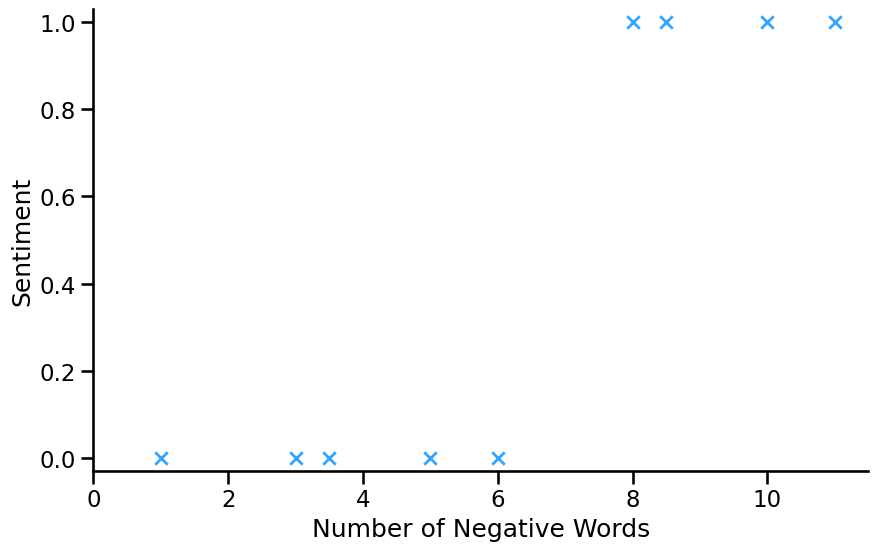

In [10]:
create_example(data, label)


## Why classification?

$$h_{b}(x)=b^{T}x$$

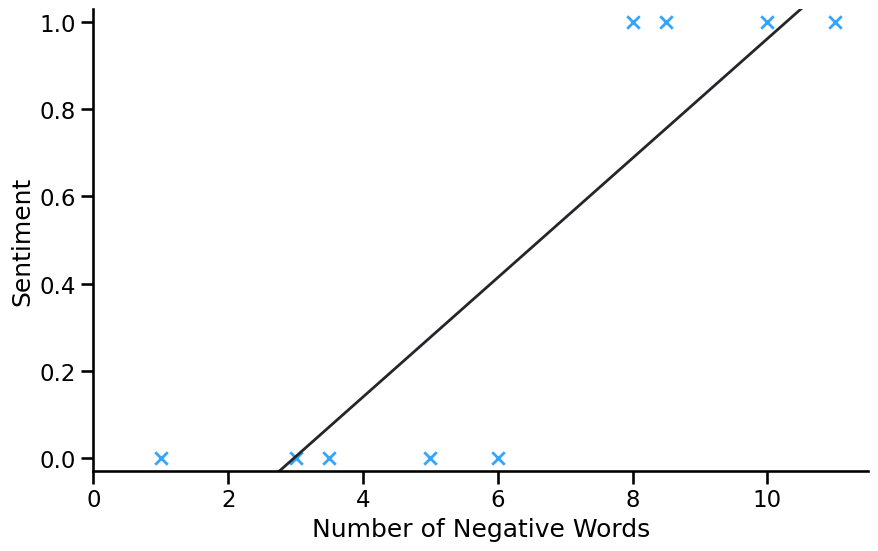

In [11]:
create_example(data, label, regression=True)

## Why classification?

if $h_{b}(x)\geq0.5$ then predict “y = 1” / sad
 
if $h_{b}(x)<0.5$ then predict “y = 0” / not sad

$$h_{b}(x)=b^{T}x$$

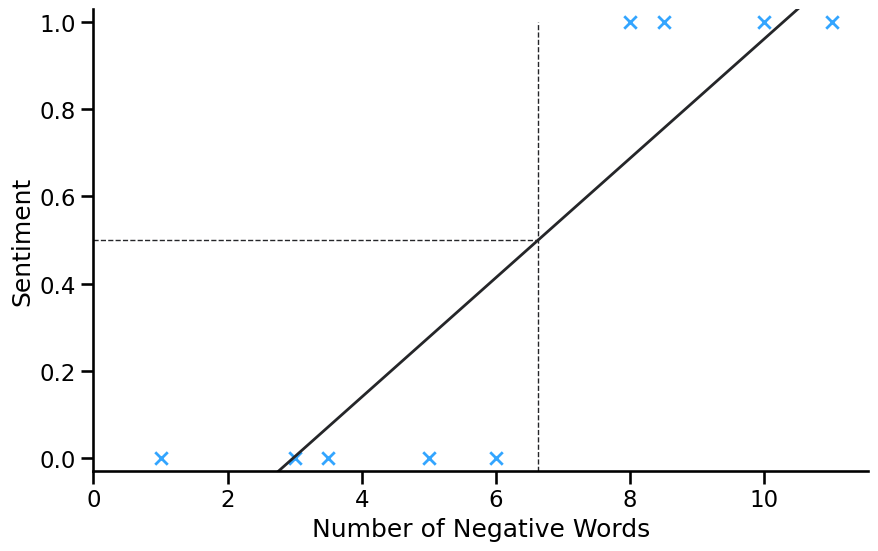

In [12]:
create_example(data, label, regression=True, add_lines=True)

## Why classification?

What happens if we have an outlier?

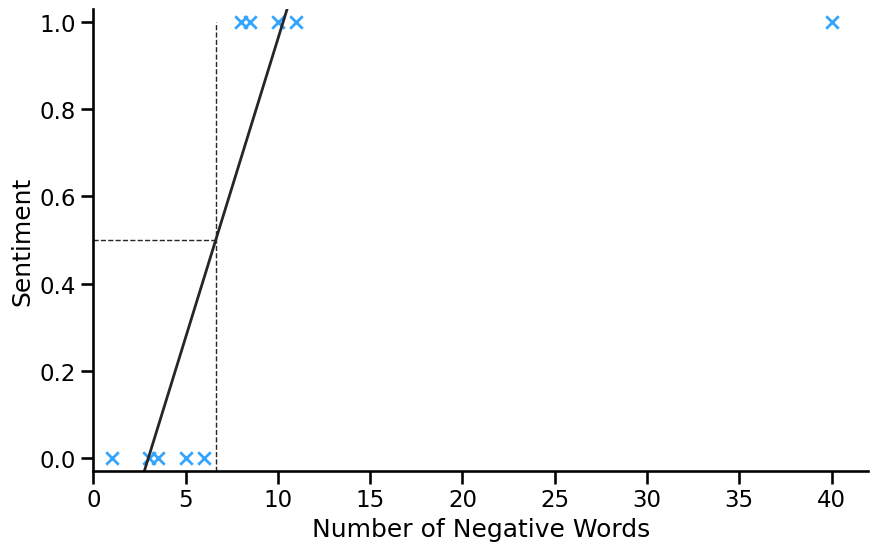

In [13]:
create_example(data, label, regression=True, add_lines=True, outlier=True)

## Why Classification?

* applying linear regression to a classification problem is usually not a great idea
* first time we got lucky and we got a hypothesis that worked well for the particular example

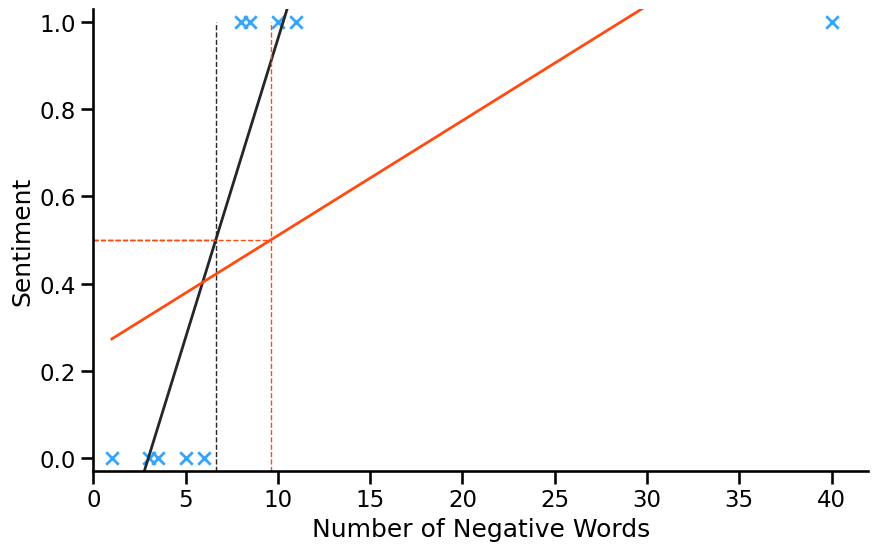

In [14]:
create_example(data, label, regression=True, add_lines=True, outlier=True, compare=True)

## Another problem with classification with linear regression (for classification)

* y can be 1 or 0 (or any other labels)  $y\in\{0,1\}$
* but the hypothesis $h_{b}(x)$ can be larger than 1 or smaller than 0 even when all the training data was with 0 and 1

$$h_{b}(x)=b^{T}x$$
$$h_{b}(x)\in\mathbb{R}$$

## Logistic Regression Model

$0\leq h_{b}(x) \leq 1$

Linear regression: $h_{b}(x)=b^{T}x$

Logistic regression: $h_{b}(x)=\sigma(b^{T}x)$


Sigmoid function aka. logistic function:  $\sigma(t)=\frac{1}{1+e^{-t}}$


### The Logistic function

* Sigmoid function makes values fit into (0,1): 
$$\sigma(t)=\frac{1}{1+e^{-t}}$$

* the sigmoid asymptotes to 0 when t goes to minus infinity: 
$$\operatorname*{lim}_{t\rightarrow-\infty}\sigma(t)=0$$

* the sigmoid asymptotes to 1 when t goes to infinity: 
$$\operatorname*{lim}_{t\rightarrow\infty}\sigma(t)=1$$

* all its values lie within (0,1)
$$\sigma(t)\in\{0,1\}$$

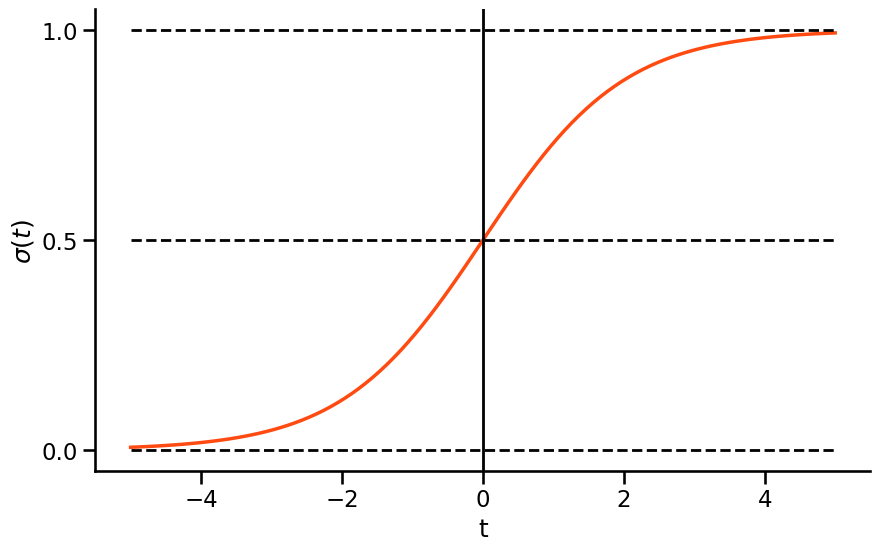

In [15]:
plot_sigmoid(nemo)

## The Logistic function

* Sigmoid function makes values fit into (0,1)

$$\sigma(t)=\frac{1}{1+e^{-t}}$$

$$h_{b}(x)=\frac{1}{1+e^{-b^Tx}}$$

* we then need to pick the parameters b
    * t is equivalent to $b^T(x)$

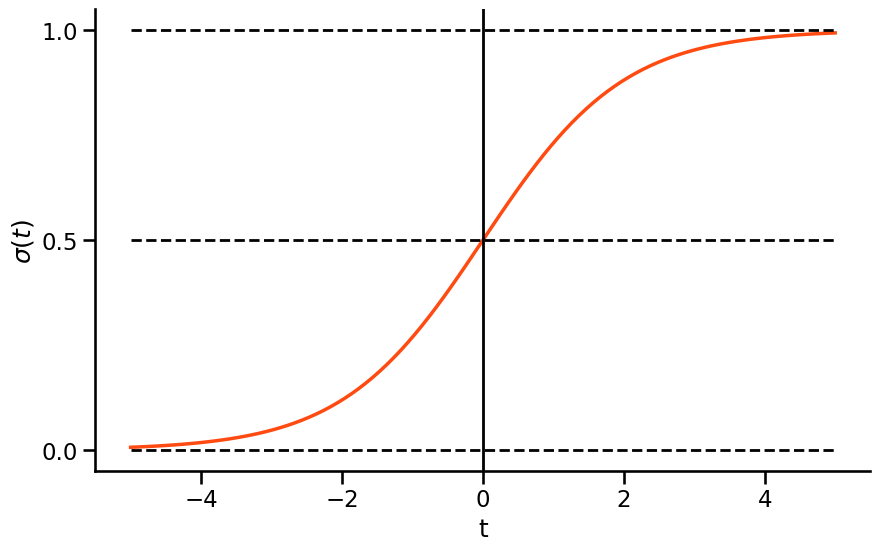

In [16]:
plot_sigmoid(nemo)

## Interpretation of the Hypothesis

$h_b(x)$ is the probability that y = 1 on input x

Example:

$$
x = \begin{bmatrix} x_0 \\ x_1\end{bmatrix} = \begin{bmatrix} 1 \\ \text{#negWords}\end{bmatrix}
$$

## Interpretation of the Hypothesis

$h_b(x)$ is the probability that y = 1 on input x

Example:

$$
x = \begin{bmatrix} x_0 \\ x_1\end{bmatrix} = \begin{bmatrix} 1 \\ \text{#negWords}\end{bmatrix}
$$

$h_{b}(x)=0.8$

The sentence has a 80% probability of being sad.
The probability of y=1 given the feature vector x is 80%

Notation:

$h_{b}(x)=p(y=1\mid x;b)$

Notes: I’m going to count on my hypothesis to give me estimates of the probability that y = 1.

## Interpretation of the Hypothesis

$h_b(x)$ is the probability that y = 1 on input x

Example:

$$
x = \begin{bmatrix} x_0 \\ x_1\end{bmatrix} = \begin{bmatrix} 1 \\ \text{#negWords}\end{bmatrix}
$$

$h_{b}(x)=0.8$

The sentence has a 80% probability of being sad.
The probability of y=1 given the feature vector x is 80%

Notation:

$h_{b}(x)=p(y=1\mid x;b)$

What is: $$p(y=0\mid x;b)$$

Notes: I’m going to count on my hypothesis to give me estimates of the probability that y = 1.

## Interpretation of the Hypothesis

This is a classification problem, so y has to be 0 or 1

$$p(y=1\mid x;b)+p(y=0\mid x;b)=1$$

$$h_{b}(x)=\ p(y=1\mid x;b)\ =\ 1\ -\ p(y=0\mid x;b)$$

$$\underbrace{p(y=1\mid x;b)}_{\color{red}{\text{sad}}}+ \underbrace{p(y=0\mid x;b)}_{\color{green}{\text{not sad (happy)}}} = 1$$

$$h_{b}(x)=\underbrace{p(y=1\mid x;b)}_{\color{red}{\text{sad}}} =  1-\underbrace{p(y=0\mid x;b)}_{\color{green}{\text{not sad (happy)}}}$$

Notes: “From cristoph bishop p 205: the posterior propability of class c1 can be written as a logistic sigmoid acting on a linear function of the feature vector (x).”

## The decision boundary

* we could do 0.5 as the threshold (default in sklearn implementation)
* If the probability is bigger than or equal to 0.5 it is classified as 1, else as 0.


$$ \hat{y}= \begin{cases} 1 & \text{if } \hat{p} \ge 0.5 \\ 0 & \text{if } \hat{p} < 0.5 \ \end{cases} $$

* **For what t is the sigmoid greater than 0.5?**

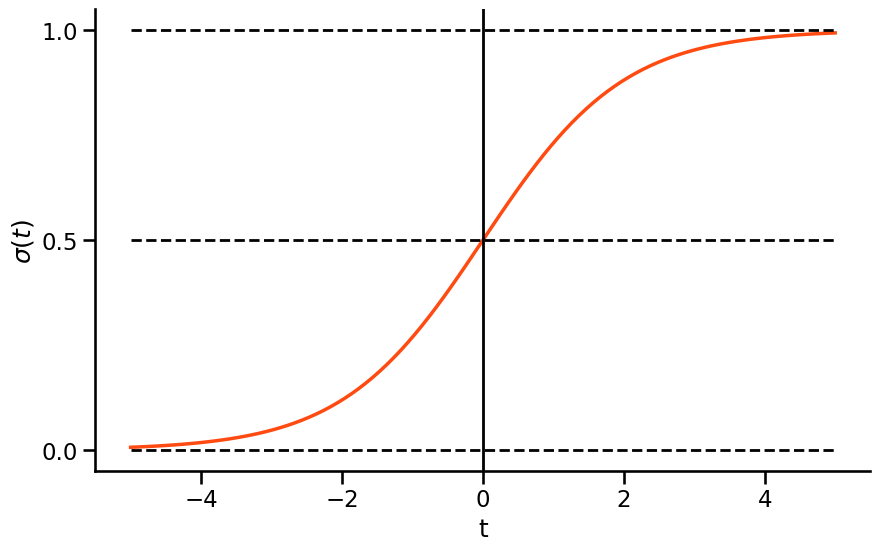

In [17]:
plot_sigmoid(nemo)

## The decision boundary

* we could do 0.5 as the threshold (default in sklearn implementation)
* If the probability is bigger than or equal to 0.5 it is classified as 1, else as 0.

$$ \begin{array}{c}{{\hat{p}\:=\:\sigma\bigl(b^{T}\,x\bigr)\:\ge\:0.5}}\\ {{b^{T}\:x\geq0}}\end{array}$$

* **When do we predict y = 0?**


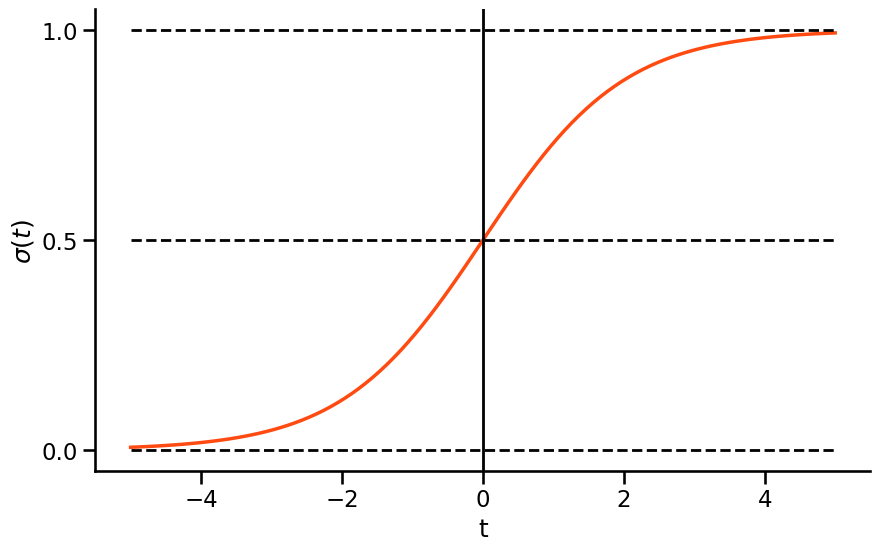

In [18]:
plot_sigmoid(nemo)

## Classification
* Now classification will be based on probabilities
* 0.5 is the threshold
* If the probability is bigger than or equal to 0.5 it is classified as 1, else as 0.

$$ \hat{y}= \begin{cases} 1 & \text{if } \hat{p} \ge 0.5 \\ 0 & \text{if } \hat{p} < 0.5 \ \end{cases} $$

**Why 0.5? Good question!**

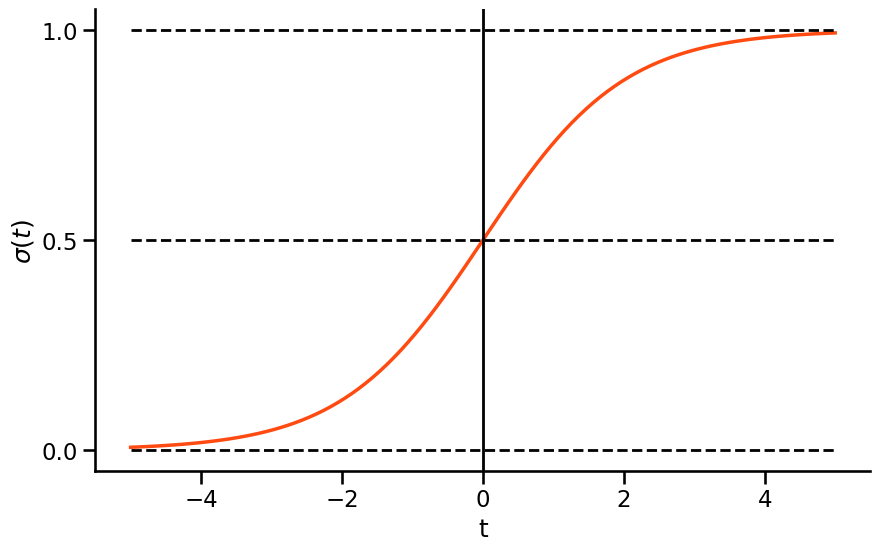

In [19]:
plot_sigmoid(nemo)

Notes: the answer is… business case! check the next slide

## The Logistic Function
<div class="group">
  <div class="text">
      
Remember: The threshold corresponds to your
business problem!
      
  </div>
  <div class="images">
    <img src="../images/logistic_regression/ROC_curve_transparent_bg.png">
  </div>
</div>

# Hands on.
# Example time!

## Decision Boundary Example

Let’s use Logistic regression!

* We have some texts to classify as **sad** (class 1) or **happy** (class 0)

* Our features are:
    * x1: number of negative words
    * x2: number of sad smileys

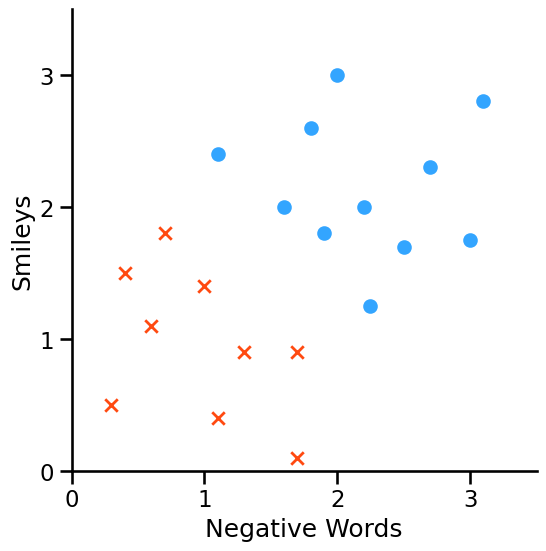

In [20]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False))

## Decision Boundary Example

$\hat{p} = \sigma(b_0+ b_1 x_1 +b_2 x_2) = \sigma(b^T x)$

$b = \begin{bmatrix}b_0\\b_1\\b_2 \end{bmatrix}$,  $X = \begin{bmatrix}x_0=1\\x_1\\x_2 \end{bmatrix}$

$b^{T}\cdot X=\begin{bmatrix}b_0 & b_1 & b_2 \end{bmatrix}\cdot\begin{bmatrix}x_0\\x_1\\x_2 \end{bmatrix}=\,b_{0}\cdot x_{0}\,+\,b_{1}\cdot x_{1}\,+\,b_{2}\cdot\,x_{2}$

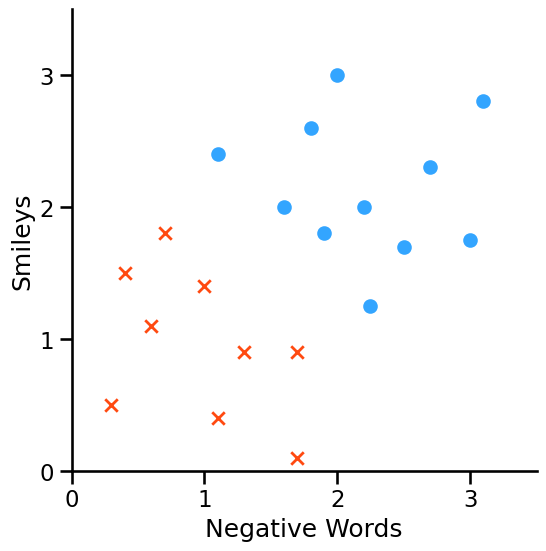

In [21]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False))

Notes: T enters and brings the parameters!

## Decision Boundary Example

$b=\left[\begin{array}{c}{{-3\ }}\\ {{1}}\\ {{1}}\end{array}\right]$

$\hat{p} = \sigma(b_0+ b_1 x_1 +b_2 x_2) = \sigma(b^T x)$

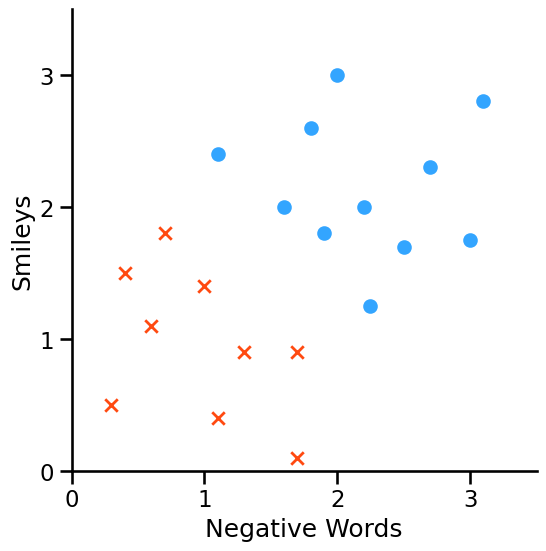

In [22]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False))

## Decision Boundary Example

$b=\left[\begin{array}{c}{{-3\ }}\\ {{1}}\\ {{1}}\end{array}\right]$


$\begin{align*}
\hat{p} &= \sigma(b_0+ b_1 x_1 +b_2 x_2) = \sigma(b^T x) \\
\hat{p} &= \sigma(-3+ x_1 +x_2) = \sigma(b^T x)
\end{align*}$


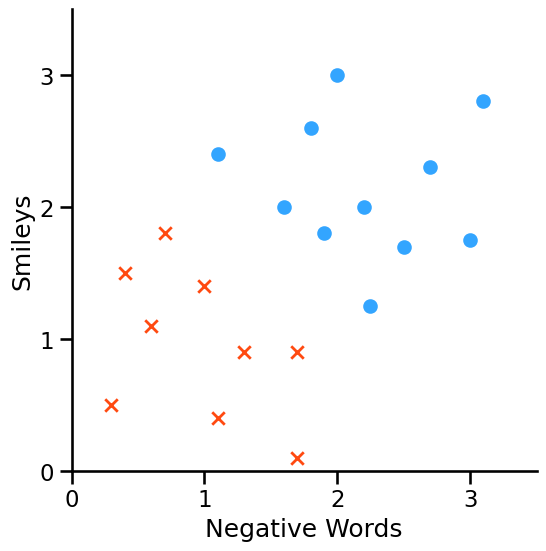

In [23]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False))

## Decision Boundary Example


$\hat{p} = \sigma(-3+ x_1 +x_2) = \sigma(b^T x)$


We predict “y = 1” when:

$\hat{p}\geq0.5 \text{ when } b^T x\geq0$ (remember the sigmoid function!)


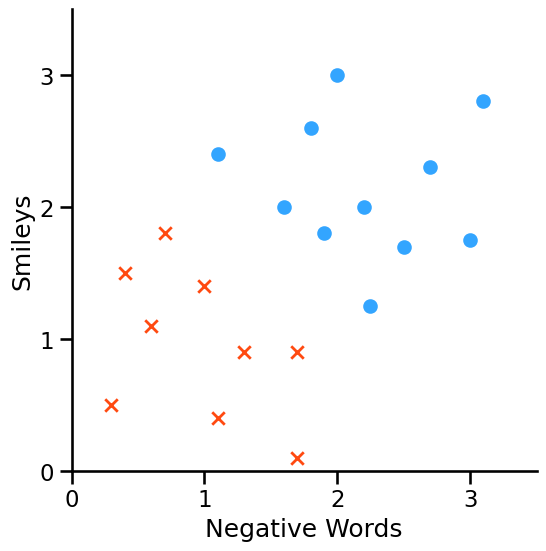

In [24]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False))

## Decision Boundary Example

$\hat{p} = \sigma(-3+ x_1 +x_2) = \sigma(b^T x)$


We predict “y = 1” when:

$\hat{p}\geq0.5 \text{ when } b^T x\geq0$

$\begin{align*}
-3+x_1+x_2\geq0 \\
x_1+x_2\geq3
\end{align*}$


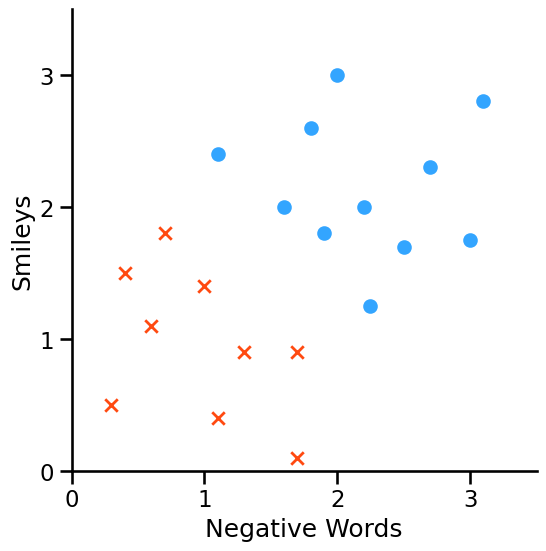

In [25]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False))

## Decision Boundary Example

$\hat{p} = \sigma(-3+ x_1 +x_2) = \sigma(b^T x)$

We predict “y = 1” when:

$\color{#0000FF}{x_1+x_2\geq3}$

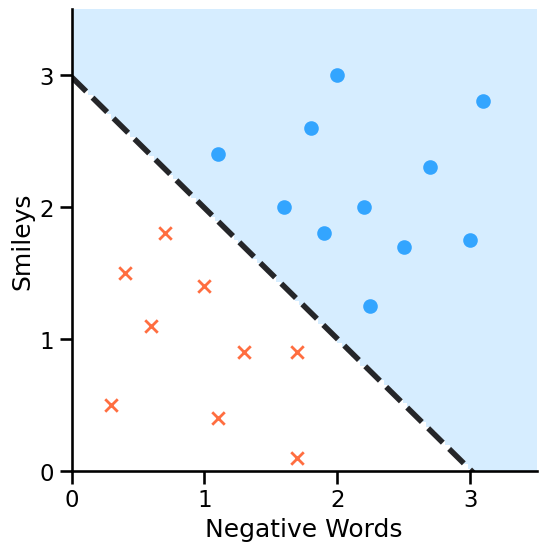

In [26]:
decision_boundary(dec_boundary=True, dec_boundary_background=(False,True))

## Decision Boundary Example

$\hat{p} = \sigma(-3+ x_1 +x_2) = \sigma(b^T x)$

We predict “y = 1” when:

$\color{#0000FF}{x_1+x_2\geq3}$

We predict “y = 0” when:

$\color{#FF4A11}{x_1+x_2<3}$

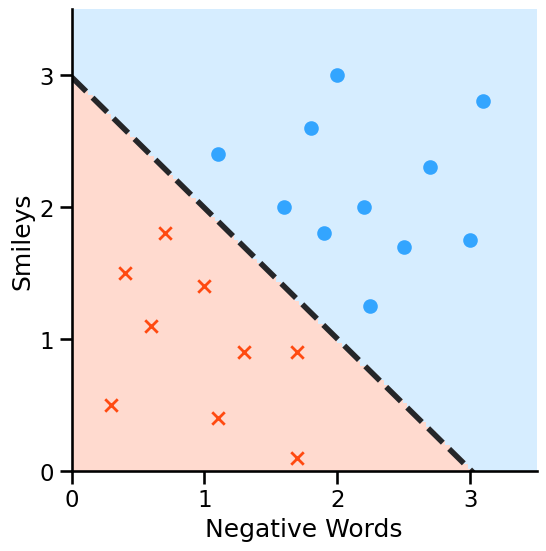

In [27]:
decision_boundary(dec_boundary=True, dec_boundary_background=(True,True))

## Decision Boundary Example

$\hat{p} = \sigma(-3+ x_1 +x_2) = \sigma(b^T x)$

We predict “y = 1” when:

$\color{#0000FF}{x_1+x_2\geq3}$

We predict “y = 0” when:

$\color{#FF4A11}{x_1+x_2<3}$

Decision Boundary:

$\begin{align*}
x_1+x_2=3 \\
x_2=3-x_1
\end{align*}$


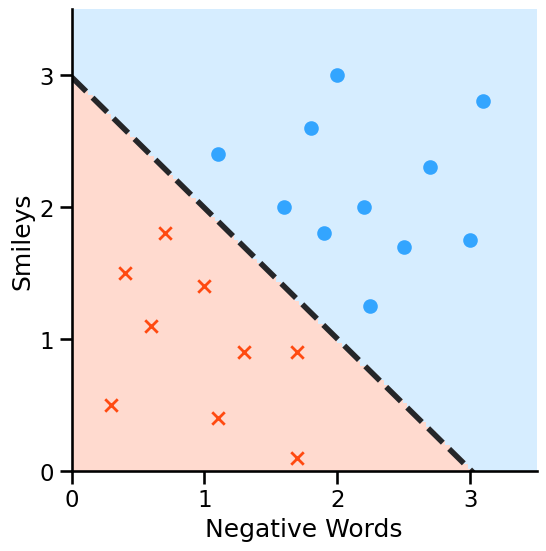

In [28]:
decision_boundary(dec_boundary=True, dec_boundary_background=(True,True))

Notes: Ask students: What if we move the threshold? revisit slide 35 for this

## Decision Boundary


The decision boundary is a property of the hypothesis and not of the data.

We fit the model to find the parameters *b* and then we can get the decision boundary based on *b*.


Spoiler alert: if you use higher order polynomial features you get a non-linear decision boundary.

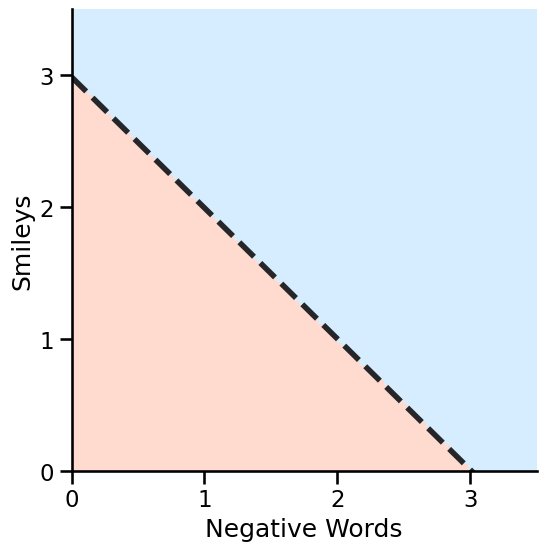

In [29]:
decision_boundary(dec_boundary=True, dec_boundary_background=(True,True), data_points=False)

Notes: Google together for non-linear decision boundaries check what happens with “the line”, ie. the decision boundary when we play with the threshold (slide 35)

<div class="group">
  <div class="text">
      
# No more mystical stuff. Let's train!
      
  </div>
  <div class="images">
    <img src="../images/logistic_regression/img_p39_1.png">
  </div>
</div>

## The Cost Function

Training set: $\{(x^1, y^1), (x^2, y^2), ... (x^n, y^n)\}$

$$ x\,=\,\left[{\begin{array}{c}{x_{0}}\\ {x_{1}}\\ {\vdots}\\ {x_{m}}\end{array}}\right],x_{0}\,=\,1,\,y\,\in\,\{0,1\}$$



How do we chose the right parameters *b*?

Fitting the parameter *b* to the data.

$$ \hat{p}=\frac{1}{1+e^{-b^{T}x}}$$

## The Cost Function

<div class="group">
  <div class="text">
      
The linear regression cost function (remember OLS).
$$ J(b)={\textstyle{\frac{1}{2n}}}\sum(\hat{p}\,-\,y)^{2}$$

Logistic regression hypothesis:
$$ \hat{p}=\frac{1}{1+e^{-b^{T}x}}$$



This would though lead to a non-convex function which is hard to optimize. The usual way to optimize is to find the global minimum.
      
  </div>
  <div class="images">
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/ec/Convex_vs._Not-convex.jpg">
  </div>
</div>

Notes: Non-convex is not non-optimizable but hard to optimize (NNs have non-convex cost functions but SGD can be applied. the global minimum is then sometimes reachable, most often suffices however small sphere around a local one) Also: Since y^ is always between 0 and 1, so would be the squared error (-> higher precision needed)

## The Cost Function

Logistic regression hypothesis:

$$ \hat{p}=\frac{1}{1+e^{-b^{T}x}}$$

$$
Loss(\hat{p},y)=\begin{cases}
-\ln{(\hat{p})} &\text{if } y=1 \\
-\ln{(1-\hat{p})} &\text{if } y=0
\end{cases}
$$

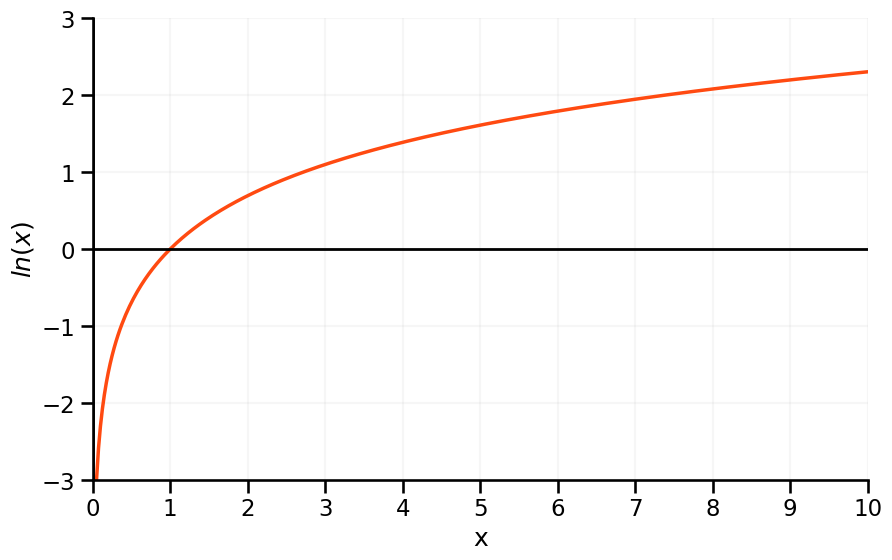

In [30]:
plot_logarithm(nemo)

## Loss based on logs of probabilities

* For instances belonging to class 1 => Loss is the negative log of $\hat{p}(y=1)$

Probability is close to zero? Loss is high!

Probability is close to one? Loss is low!


$$
Loss(\hat{p},y)=\begin{cases}
-\ln{(\hat{p})} &\text{if } y=1 \\
-\ln{(1-\hat{p})} &\text{if } y=0
\end{cases}
$$

For (correct) probabilities of 0 / 1, the loss would be zero.

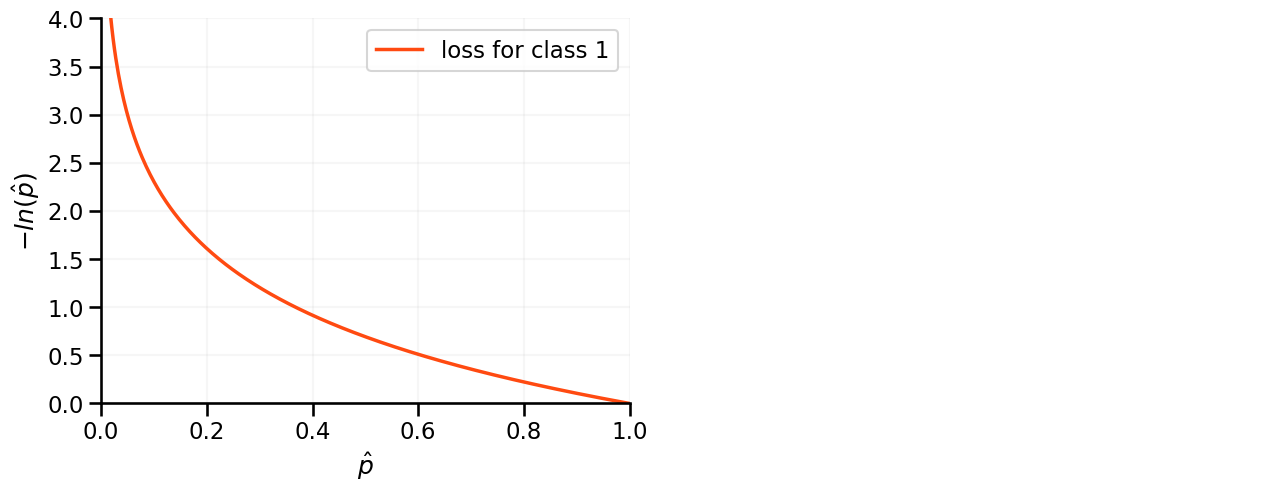

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_loss(nemo, 1, ax=ax[0])
ax[1].axis('off');

## Loss based on logs of probabilities

* For instances belonging to class 0
=> Loss is the negative log of $1-\hat{p}(y=1)$

Probability is close to zero? Loss is low!

Probability is close to one? Loss is high!


$$
Loss(\hat{p},y)=\begin{cases}
-\ln{(\hat{p})} &\text{if } y=1 \\
-\ln{(1-\hat{p})} &\text{if } y=0
\end{cases}
$$

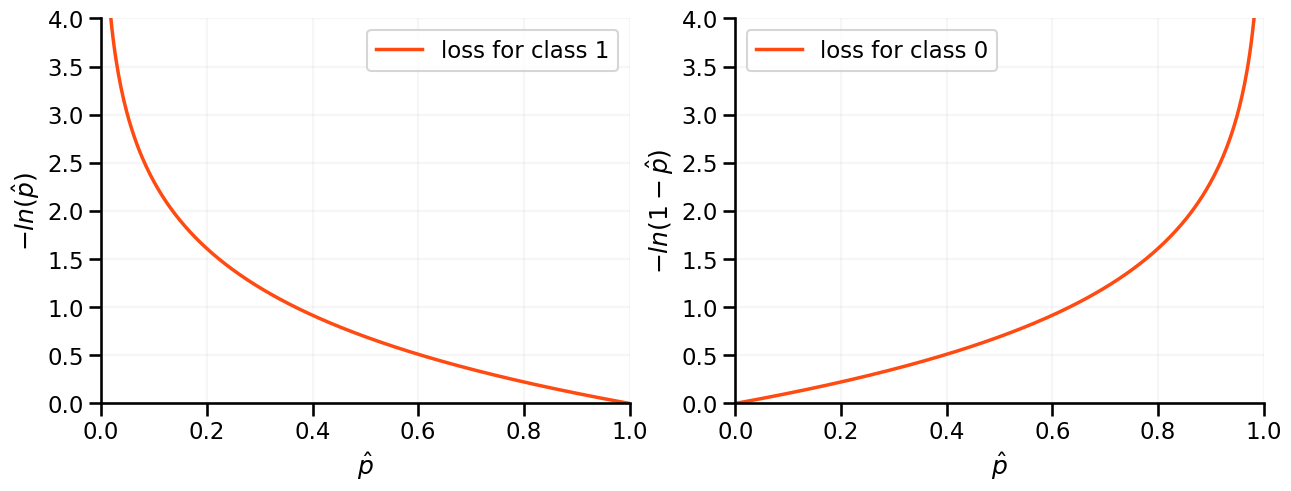

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_loss(nemo, 1, ax=ax[0])
plot_loss(nemo, 0, ax=ax[1])

## Now, just add it all up

$$
Loss(\hat{p},y)=\begin{cases}
-\ln{(\hat{p})} &\text{if } y=1 \\
-\ln{(1-\hat{p})} &\text{if } y=0
\end{cases}
$$

Because y is always 0 or 1 we can write this:

$$
Loss(\hat{p},y)=y\cdot\big(-\ln{(\hat{p})}\big)+(1-y)\cdot\big(-\ln{(1-\hat{p})}\big)
$$

$$
Loss(\hat{p},y)= \underbrace{y\cdot\big(-\ln{(\hat{p})}\big)}_{\color{grey}{\text{“disabled” for }}y=0}+\underbrace{(1-y)\cdot\big(-\ln{(1-\hat{p})}\big)}_{\color{grey}{\text{“disabled” for }}y=1}
$$

## Now, just add it all up

$$
Loss(\hat{p},y)=\begin{cases}
-\ln{(\hat{p})} &\text{if } y=1 \\
-\ln{(1-\hat{p})} &\text{if } y=0
\end{cases}
$$
Because y is always 0 or 1 we can write this:

$$\begin{align*}
Loss(\hat{p},y) &= y\cdot\big(-\ln{(\hat{p})}\big)+(1-y)\cdot\big(-\ln{(1-\hat{p})}\big) \\
Loss(\hat{p},y) &= -\big[y\ln{(\hat{p})} + (1-y)\ln{(1-\hat{p})}\big]
\end{align*}$$

This loss function can be directly obtained from MLE (maximum likelihood estimation)

## Now, let’s use the Loss function for all observations!

$$\begin{align*}
Loss(\hat{p},y) &= -\big[y\ln{(\hat{p})} + (1-y)\ln{(1-\hat{p})}\big] \\
J(b) &= -\frac{1}{n}\sum\big[y\ln\left(\hat{p}\right)\ +\ (1-y)\ln\left(1-\hat{p}\right)\big]
\end{align*}$$

Find *b* that minimizes J(b).

To minimize the cost function we use gradient descent!


## Minimizing J - find 𝜃

* There is no closed form solution as the Normal Equation (X X) X y for linear regression. 

* So get the partial derivatives and start the **gradient descent**!

$$\frac{\partial}{\partial b_{j}}J(b)=\frac{1}{n}\sum_{i=1}^{n}\Bigl(\sigma\Bigl(b^{T}x_{i}\Bigr)-y_{i}\Bigr)x_{i,j}$$

![img_p1_1](../images/logistic_regression/img_p49_1.png)

## Conclusion

<div class="group">
  <div class="text">
      
Training the model ~ finding *b* that minimizes *J* ~ finding the shape of the decision boundary.

Changing the classification **threshold** from 0.5 (default) ~ changing the position of the decision boundary (but
not the shape).
      
  </div>
  <div class="images">
    <img src="../images/logistic_regression/decision_boundary_circles_transparent_bg.png">
  </div>
</div>

[Hands on Machine Learning](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)
[](https://www.coursera.org/learn/machine-learning)Machine Learning course with Andrew Ng
Complex decision boundary
[https://www.researchgate.net/figure/Classification-results-of-SVC-with-the-nonlinear-decision-boundary_fig1_25557](https://www.researchgate.net/figure/Classification-results-of-SVC-with-the-nonlinear-decision-boundary_fig1_255572951)
[2951](https://www.researchgate.net/figure/Classification-results-of-SVC-with-the-nonlinear-decision-boundary_fig1_255572951)


